In [1]:
import sys
sys.path.append("/home/olnavy/Scripts/paleoclim_leeds/")
import os
import util_hadcm3 as util
import hadcm3_processing as hcm3
import processing as proc
import zones
import xarray as xr
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cftime
import numpy as np
import SCM6
import matplotlib.colors as colors

/home/olnavy/anaconda3/envs/Olnavy/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [11]:
start_year = 2800
end_year = 2810

box_iceland = zones.Box(lon_min=320, lon_max=340, lat_min=55, lat_max=65)
box_na = zones.Box(lon_min=320, lon_max=340, lat_min=5, lat_max=15)


ts = hcm3.SATMTS("xosfa", start_year, end_year)
sat = ts.sat(zone=box_iceland, mode_t="mean")

__ Importation of <class 'hadcm3_processing.SATMTS'> : xosfa between years 2800 and 2810.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS instance.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.
____ Coordinates cropped to the new data.


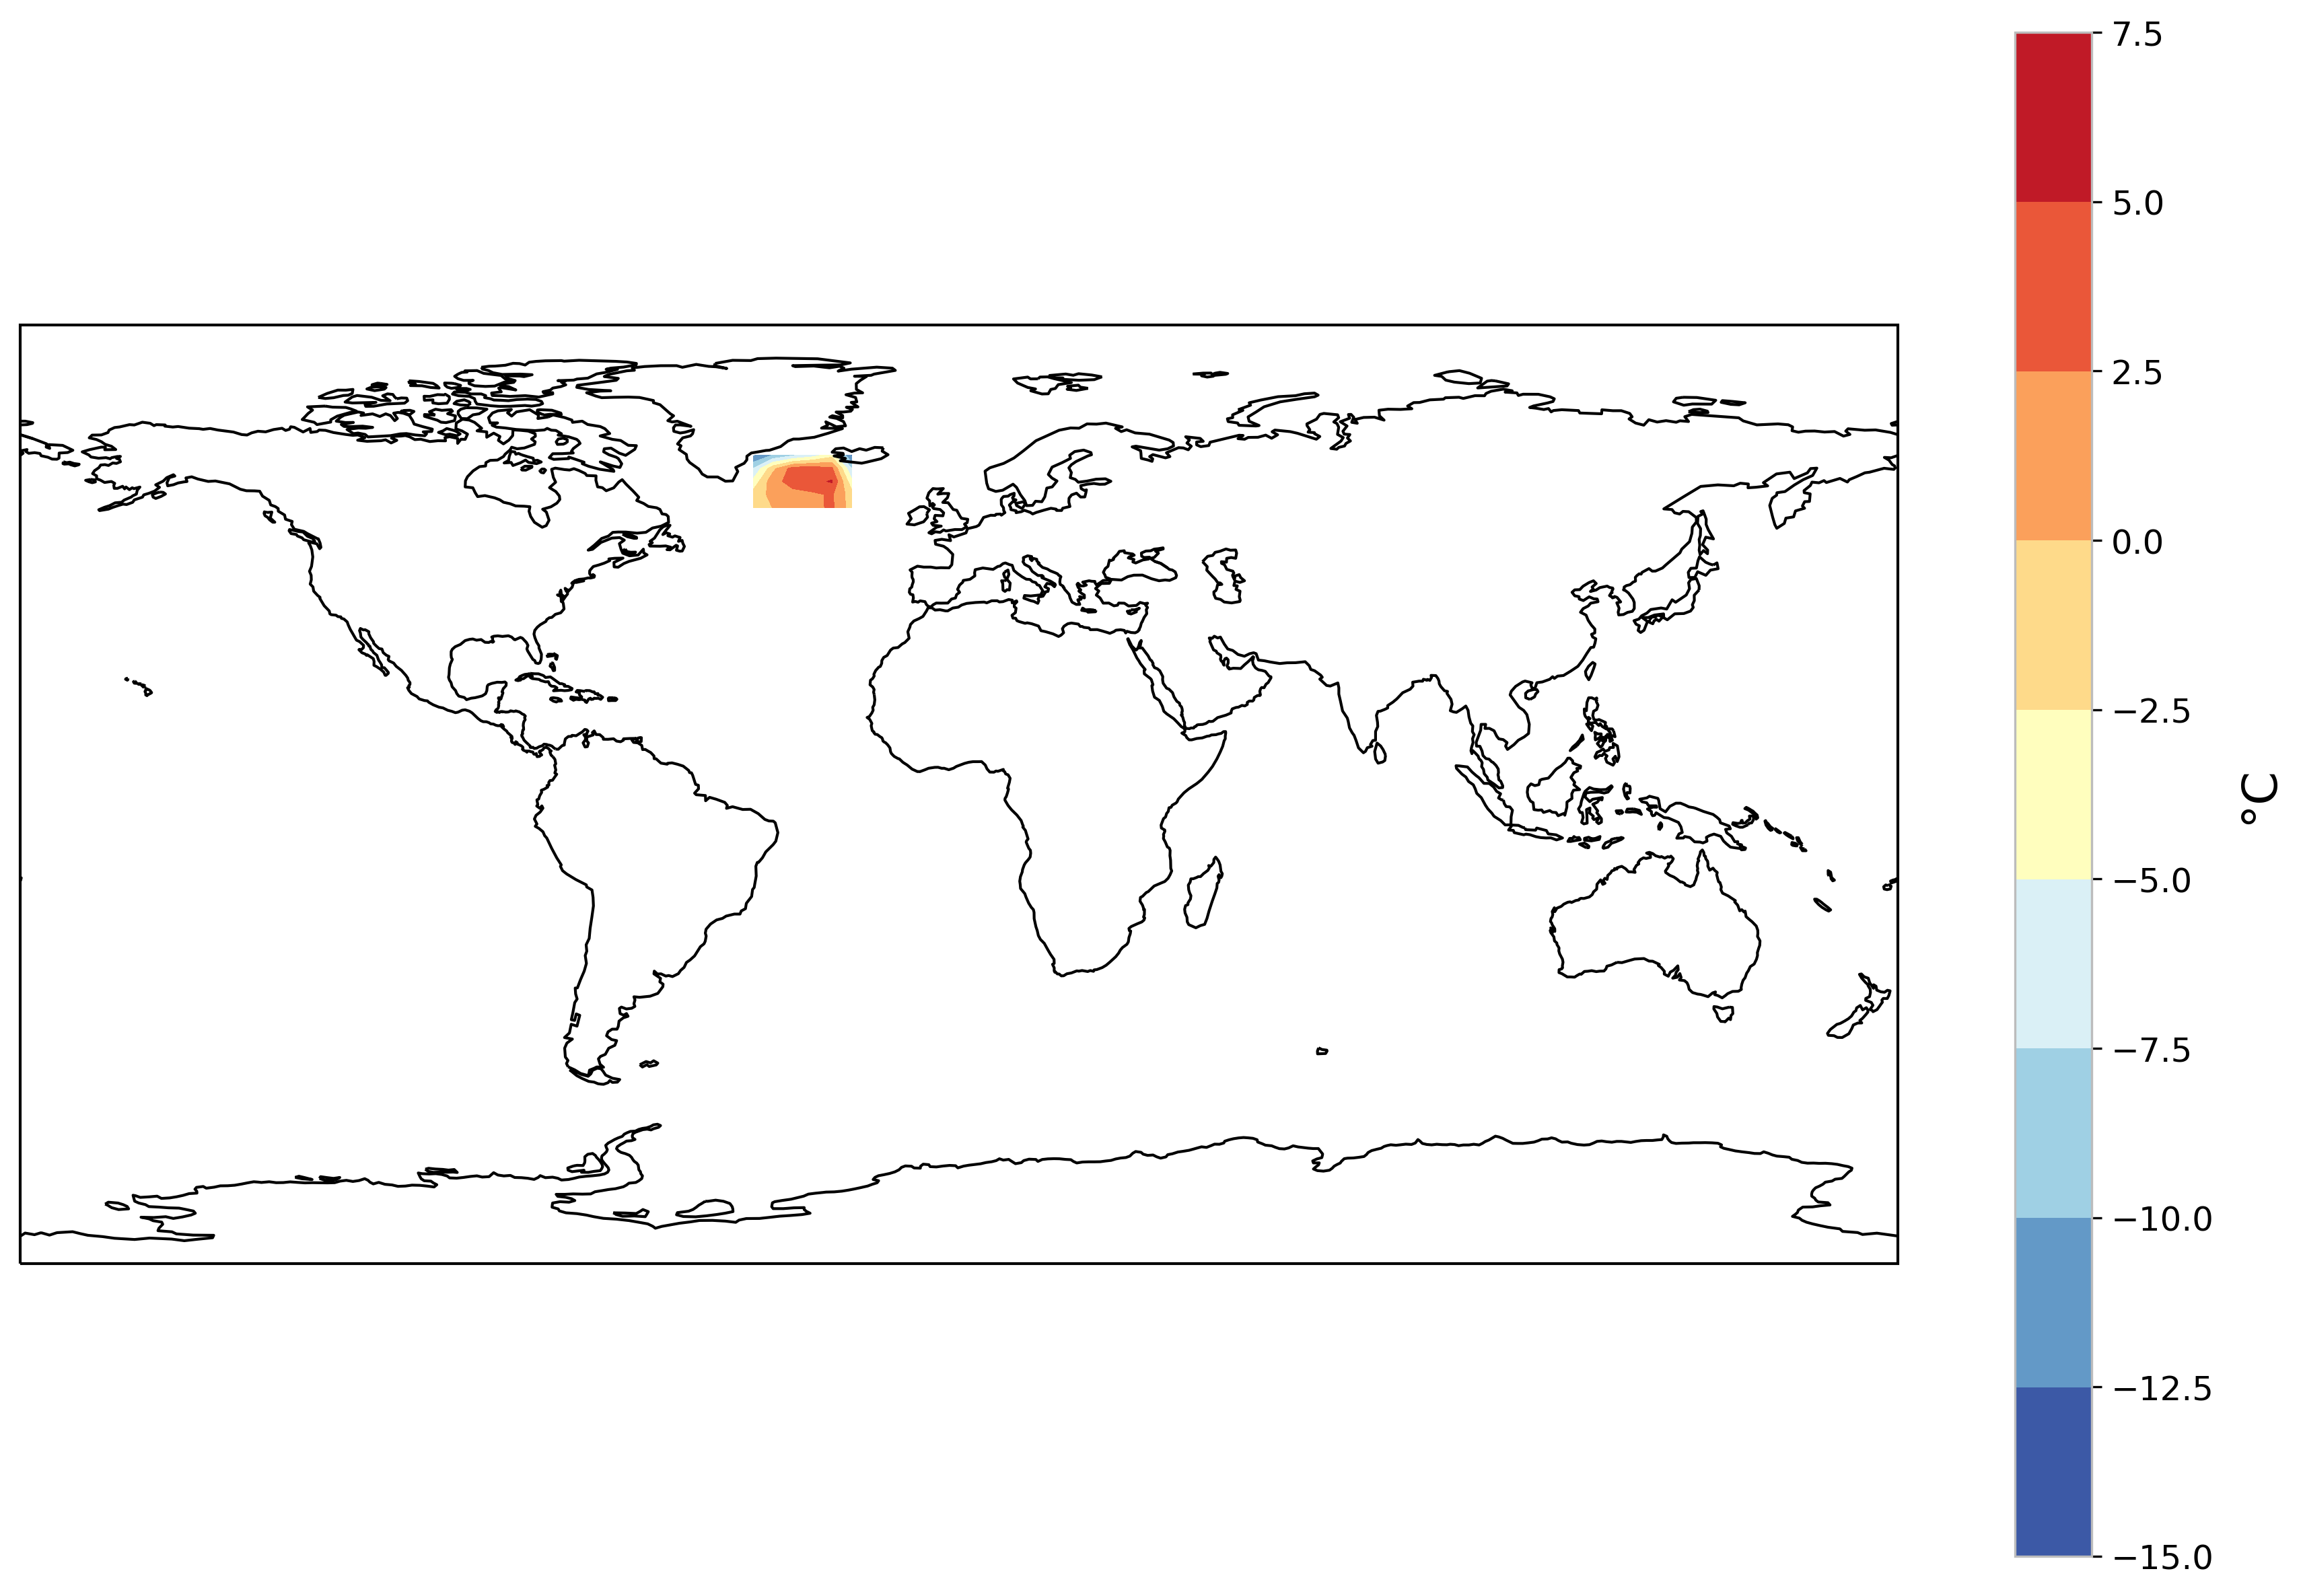

In [9]:
projection_map = ccrs.PlateCarree()
figMap = plt.figure(figsize=(15, 10), dpi=300)
axMap = figMap.add_subplot(1, 1, 1, projection=projection_map)

cmap = axMap.contourf(sat.lon_b, sat.lat_b, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()
figMap.colorbar(mappable=cmap, ax=axMap, label="°C")

__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.
____ Coordinates cropped to the new data.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.
____ Coordinates cropped to the new data.


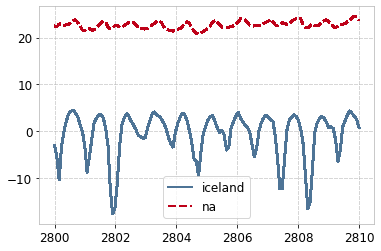

In [22]:
sat_iceland = ts.sat(zone=box_iceland, mode_lon="mean", mode_lat="mean")
sat_na = ts.sat(zone=box_na, mode_lon="mean", mode_lat="mean")

years = np.linspace(start_year, end_year, len(sat_iceland.t))
plt.plot(years, sat_iceland.values(processing=False), label="iceland")
plt.plot(years, sat_na.values(processing=False), label="na")
plt.legend()

In [18]:
sat_iceland.values(processing=False)

array([ -3.0342782 ,  -5.627845  , -10.426416  ,  -3.3244789 ,
        -0.21673462,   2.0576355 ,   3.5852273 ,   4.2563796 ,
         4.4750395 ,   3.8863564 ,   3.039939  ,   1.3465625 ,
        -0.08320322,  -3.130086  ,  -8.763839  ,  -5.4420958 ,
        -1.8385499 ,   1.6947399 ,   2.741344  ,   3.4433143 ,
         3.4845314 ,   2.780397  ,   0.6201575 ,  -3.0380194 ,
       -12.483548  , -17.715666  , -16.490582  , -11.152033  ,
        -3.3219457 ,   1.3041785 ,   2.8939586 ,   3.7217247 ,
         3.1507154 ,   2.060061  ,   1.2757066 ,   0.35989746,
        -0.88588446,  -1.1666014 ,  -1.5366541 ,  -1.4107482 ,
         0.5905713 ,   2.068324  ,   3.6736283 ,   4.1022167 ,
         3.4212232 ,   3.1783853 ,   2.6027749 ,   1.7138233 ,
         0.5613623 ,  -1.3238128 ,  -2.6038785 ,  -3.411613  ,
        -0.31804565,   1.607301  ,   2.8850427 ,   3.862683  ,
         3.5241199 ,   2.344364  ,   0.17407894,  -2.2394593 ,
        -5.8592978 ,  -6.426187  ,  -9.572061  ,  -4.51

## temperature_plots